<a href="https://colab.research.google.com/github/kaulirio/FIAP-Datathon/blob/main/Tech_Challenge_Fase-5_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports JSON files from my personal Google Drive (files made public)



In [137]:
#Use gdown to Access the File
import gdown

# Replace with your own FILE_ID
file_Prospects  = '1sh88eHjyIp0wXtcRIFozgN064VGOOxEs'
file_Applicants = '17859ae_Ki5CImI9-1lhJ335GMDW0f2Qr'
file_Vagas      = '1YKM7yDTzjHJVf82l2RxEx-SuLxFxCxrl'

# Download the JSON files
gdown.download(f'https://drive.google.com/uc?export=download&id={file_Prospects}', 'prospects.json', quiet=False)
gdown.download(f'https://drive.google.com/uc?export=download&id={file_Applicants}', 'applicants.json', quiet=False)
gdown.download(f'https://drive.google.com/uc?export=download&id={file_Vagas}', 'vagas.json', quiet=False)

#Load the JSON File into Python
import json

# Load the JSON file
with open('prospects.json', 'r') as prospects_file:
    data_Prospects = json.load(prospects_file)

with open('applicants.json', 'r') as applicants_file:
    data_Applicants = json.load(applicants_file)

with open('vagas.json', 'r') as vagas_file:
    data_Vagas = json.load(vagas_file)

Downloading...
From: https://drive.google.com/uc?export=download&id=1sh88eHjyIp0wXtcRIFozgN064VGOOxEs
To: /content/prospects.json
100%|██████████| 21.5M/21.5M [00:00<00:00, 48.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?export=download&id=17859ae_Ki5CImI9-1lhJ335GMDW0f2Qr
From (redirected): https://drive.google.com/uc?export=download&id=17859ae_Ki5CImI9-1lhJ335GMDW0f2Qr&confirm=t&uuid=67ec7059-b270-4f44-ae69-1cbe72650998
To: /content/applicants.json
100%|██████████| 204M/204M [00:00<00:00, 204MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1YKM7yDTzjHJVf82l2RxEx-SuLxFxCxrl
To: /content/vagas.json
100%|██████████| 38.7M/38.7M [00:00<00:00, 256MB/s]


##Testing the dictionary

In [138]:
#list(data_Prospects.keys())[:10]
list(data_Applicants.keys())[:10]

['31000',
 '31001',
 '31002',
 '31003',
 '31004',
 '31005',
 '31006',
 '31007',
 '31008',
 '31009']

In [139]:
#list(data_Prospects.items())[:10]
list(data_Applicants.items())[:2]

[('31000',
  {'infos_basicas': {'telefone_recado': '',
    'telefone': '(11) 97048-2708',
    'objetivo_profissional': '',
    'data_criacao': '10-11-2021 07:29:49',
    'inserido_por': 'Luna Correia',
    'email': 'carolina_aparecida@gmail.com',
    'local': '',
    'sabendo_de_nos_por': '',
    'data_atualizacao': '10-11-2021 07:29:49',
    'codigo_profissional': '31000',
    'nome': 'Carolina Aparecida'},
   'informacoes_pessoais': {'data_aceite': 'Cadastro anterior ao registro de aceite',
    'nome': 'Carolina Aparecida',
    'cpf': '',
    'fonte_indicacao': ':',
    'email': 'carolina_aparecida@gmail.com',
    'email_secundario': '',
    'data_nascimento': '0000-00-00',
    'telefone_celular': '(11) 97048-2708',
    'telefone_recado': '',
    'sexo': '',
    'estado_civil': '',
    'pcd': '',
    'endereco': '',
    'skype': '',
    'url_linkedin': '',
    'facebook': ''},
   'informacoes_profissionais': {'titulo_profissional': '',
    'area_atuacao': '',
    'conhecimentos_tecni

## Convert the JSON so that each data line in the JSON file is represented as a separate row in the DataFrame


In [140]:
#Import pandas
import pandas as pd

In [141]:
# Convert the JSON so that each prospect candidate is represented as a separate row in the DataFrame
# -----------------------
#prospects.JSON file
# -----------------------
records = []

for prof_id, profile_info in data_Prospects.items():
    titulo = profile_info.get("titulo")
    modalidade = profile_info.get("modalidade")

    for prospect in profile_info.get("prospects", []):
        record = {
            "id_prospect": prof_id,
            "titulo": titulo,
            "modalidade": modalidade,
            "nome_candidato": prospect.get("nome"),
            "codigo_candidato": prospect.get("codigo"),
            "situacao_candidado": prospect.get("situacao_candidado"),
            "data_candidatura": prospect.get("data_candidatura"),
            "ultima_atualizacao": prospect.get("ultima_atualizacao"),
            "comentario": prospect.get("comentario"),
            "recrutador": prospect.get("recrutador")
        }
        records.append(record)

# Convert to DataFrame
df_Prospects = pd.DataFrame(records)


# -----------------------
#applicants.JSON file
# -----------------------
records = []

for prof_id, profile_info in data_Applicants.items():
    record = {
        "id_applicant": prof_id
    }

    # Flatten sections
    for section_name, section_data in profile_info.items():
        if isinstance(section_data, dict):
            for key, value in section_data.items():
                record[f"{section_name}__{key}"] = value
        else:
            # Just in case any sections are not dicts (e.g., cv_pt or cv_en directly under profile)
            record[section_name] = section_data

    records.append(record)

# Convert to DataFrame
df_Applicants = pd.DataFrame(records)


# -----------------------
#vagas.JSON file
# -----------------------
records = []

for prof_id, profile_info in data_Vagas.items():
    record = {
        "id_vaga": prof_id
    }

    # Flatten sections
    for section_name, section_data in profile_info.items():
        if isinstance(section_data, dict):
            for key, value in section_data.items():
                record[f"{section_name}__{key}"] = value
        else:
            record[section_name] = section_data

    records.append(record)

# Convert to DataFrame
df_Vagas = pd.DataFrame(records)

# Show the DataFrame
df_Prospects.head()

,id_prospect,titulo,modalidade,nome_candidato,codigo_candidato,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,4530,CONSULTOR CONTROL M,,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira
1,4530,CONSULTOR CONTROL M,,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano
3,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano
4,4533,2021-2605708-Microfocus Application Life Cycle...,,Arthur Almeida,26338,Contratado pela Decision,29-04-2021,18-05-2021,,Stella Vieira


##Testing the DataFrame

In [142]:
df_Prospects.columns

Index(['id_prospect', 'titulo', 'modalidade', 'nome_candidato',
       'codigo_candidato', 'situacao_candidado', 'data_candidatura',
       'ultima_atualizacao', 'comentario', 'recrutador'],
      dtype='object')

In [143]:
df_Vagas.columns

Index(['id_vaga', 'informacoes_basicas__data_requicisao',
       'informacoes_basicas__limite_esperado_para_contratacao',
       'informacoes_basicas__titulo_vaga', 'informacoes_basicas__vaga_sap',
       'informacoes_basicas__cliente',
       'informacoes_basicas__solicitante_cliente',
       'informacoes_basicas__empresa_divisao',
       'informacoes_basicas__requisitante',
       'informacoes_basicas__analista_responsavel',
       'informacoes_basicas__tipo_contratacao',
       'informacoes_basicas__prazo_contratacao',
       'informacoes_basicas__objetivo_vaga',
       'informacoes_basicas__prioridade_vaga',
       'informacoes_basicas__origem_vaga',
       'informacoes_basicas__superior_imediato', 'informacoes_basicas__nome',
       'informacoes_basicas__telefone', 'perfil_vaga__pais',
       'perfil_vaga__estado', 'perfil_vaga__cidade', 'perfil_vaga__bairro',
       'perfil_vaga__regiao', 'perfil_vaga__local_trabalho',
       'perfil_vaga__vaga_especifica_para_pcd', 'perfil_vaga_

In [144]:
#data_Profiles_df.head()
#filtered_df = data_Profiles_df[data_Profiles_df['id_applicant'] == "31000"]
df_Applicants.columns

Index(['id_applicant', 'infos_basicas__telefone_recado',
       'infos_basicas__telefone', 'infos_basicas__objetivo_profissional',
       'infos_basicas__data_criacao', 'infos_basicas__inserido_por',
       'infos_basicas__email', 'infos_basicas__local',
       'infos_basicas__sabendo_de_nos_por', 'infos_basicas__data_atualizacao',
       'infos_basicas__codigo_profissional', 'infos_basicas__nome',
       'informacoes_pessoais__data_aceite', 'informacoes_pessoais__nome',
       'informacoes_pessoais__cpf', 'informacoes_pessoais__fonte_indicacao',
       'informacoes_pessoais__email', 'informacoes_pessoais__email_secundario',
       'informacoes_pessoais__data_nascimento',
       'informacoes_pessoais__telefone_celular',
       'informacoes_pessoais__telefone_recado', 'informacoes_pessoais__sexo',
       'informacoes_pessoais__estado_civil', 'informacoes_pessoais__pcd',
       'informacoes_pessoais__endereco', 'informacoes_pessoais__skype',
       'informacoes_pessoais__url_linkedin', '

In [145]:
# Display the first 5 rows
df_Prospects.head(15)

,id_prospect,titulo,modalidade,nome_candidato,codigo_candidato,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,4530,CONSULTOR CONTROL M,,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira
1,4530,CONSULTOR CONTROL M,,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano
3,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano
4,4533,2021-2605708-Microfocus Application Life Cycle...,,Arthur Almeida,26338,Contratado pela Decision,29-04-2021,18-05-2021,,Stella Vieira
5,4533,2021-2605708-Microfocus Application Life Cycle...,,Dante Sampaio,24645,Desistiu,27-04-2021,27-04-2021,Profissional desistiu da vaga. Motivo : Na ver...,Yasmin da Rosa
6,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,Ana Luiza Vieira,26361,Documentação PJ,28-04-2021,11-05-2021,Aguardando confirmação de inicio _,Manuella Carvalho
7,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,Isabella da Cruz,26205,Desistiu,23-04-2021,30-04-2021,"profissional não atende ou responde ligações, ...",Ana Camargo
8,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,Maria Helena Peixoto,26003,Não Aprovado pelo Cliente,08-04-2021,16-04-2021,"""Conversando com a candidata, foi exposto que ...",Carolina Araújo
9,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,Dra. Gabrielly Cassiano,25509,Desistiu,22-03-2021,22-03-2021,No momento não avalia,Dra. Luara Siqueira


In [146]:
df_Prospects['modalidade'].unique()

array(['', 'CLT', 'Cooperado', 'PJ', 'CLT - Estratégico', 'Hunting'],
      dtype=object)

In [147]:
df_Prospects.shape

(53759, 10)

In [148]:
(df_Prospects.isnull() | (df_Prospects == '')).sum()

,0
id_prospect,0
titulo,0
modalidade,52076
nome_candidato,0
codigo_candidato,0
situacao_candidado,0
data_candidatura,0
ultima_atualizacao,3913
comentario,39201
recrutador,0


# Exploratory Data Analysis

In [218]:
#Import required libraries
from datetime import datetime
from collections import Counter
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import re

##Prospects JSON file

In [150]:
df_Prospects.shape

(53759, 10)

In [151]:
#We can see the fields "modalidade", "ultima_atualizacao" and "comentario" are the columns with the most NAN or EMPTY values
(df_Prospects.isnull() | (df_Prospects == '')).sum()

,0
id_prospect,0
titulo,0
modalidade,52076
nome_candidato,0
codigo_candidato,0
situacao_candidado,0
data_candidatura,0
ultima_atualizacao,3913
comentario,39201
recrutador,0


In [152]:
df_Prospects.columns

Index(['id_prospect', 'titulo', 'modalidade', 'nome_candidato',
       'codigo_candidato', 'situacao_candidado', 'data_candidatura',
       'ultima_atualizacao', 'comentario', 'recrutador'],
      dtype='object')

In [153]:
df_Prospects.dtypes

,0
id_prospect,object
titulo,object
modalidade,object
nome_candidato,object
codigo_candidato,object
situacao_candidado,object
data_candidatura,object
ultima_atualizacao,object
comentario,object
recrutador,object


In [154]:
df_Prospects.nunique()

,0
id_prospect,11279
titulo,9910
modalidade,6
nome_candidato,26247
codigo_candidato,29405
situacao_candidado,21
data_candidatura,1793
ultima_atualizacao,1584
comentario,12194
recrutador,77


In [155]:
#Coluna modadlidade possui 3% de dados preenchidos, por este motivo será excluído da análise
df_Prospects['modalidade'].unique()

array(['', 'CLT', 'Cooperado', 'PJ', 'CLT - Estratégico', 'Hunting'],
      dtype=object)

In [156]:
#Coluna comentario possui 27% de dados preenchidos, por este motivo será excluído da análise
df_Prospects['comentario'].unique()

array(['Encaminhado para  - PJ R$ 72,00/hora',
       'encaminhado para  - R$ 6.000,00 – CLT Full , não tem empresa aberta',
       'Data de Inicio: 12/04/2021', ...,
       'Não aprovado pelo RH Léia Decision - Encaminhei via sistema por engano. (Não cheguei a encaminhar ao comercial)',
       'Entrevista agendada para 27/02, às 9:30',
       'Recebeu a confirmação de outro processo seletivo (remoto) e aceitou.'],
      dtype=object)

In [157]:
#Excluindo colunas modalidade e comentario
df_Prospects.drop('modalidade',axis=1,inplace=True)
df_Prospects.drop('comentario',axis=1,inplace=True)

In [158]:
df_Prospects.columns

Index(['id_prospect', 'titulo', 'nome_candidato', 'codigo_candidato',
       'situacao_candidado', 'data_candidatura', 'ultima_atualizacao',
       'recrutador'],
      dtype='object')

In [159]:
df_Prospects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_prospect         53759 non-null  object
 1   titulo              53759 non-null  object
 2   nome_candidato      53759 non-null  object
 3   codigo_candidato    53759 non-null  object
 4   situacao_candidado  53759 non-null  object
 5   data_candidatura    53759 non-null  object
 6   ultima_atualizacao  53759 non-null  object
 7   recrutador          53759 non-null  object
dtypes: object(8)
memory usage: 3.3+ MB


In [160]:
df_Prospects.value_counts()

id_prospect  titulo                                     nome_candidato           codigo_candidato  situacao_candidado              data_candidatura  ultima_atualizacao  recrutador        
9999         Analyst Operations - Procurement 13269114  Lucas Gabriel Câmara     37624             Encaminhado ao Requisitante     09-08-2022        09-08-2022          Maria Clara Pires     1
10           Operador de Monitoração de SWC             Daniela Machado          12622             Encaminhado ao Requisitante     07-12-2018        07-12-2018          Helena Barros         1
                                                        Dr. Henry Gabriel Costa  12616             Não Aprovado pelo Requisitante  07-12-2018        07-12-2018          Helena Barros         1
                                                        Dr. Matteo Moura         12619             Encaminhado ao Requisitante     07-12-2018        07-12-2018          Helena Barros         1
                                                        Emanuella da Costa       12614             Encaminhado ao Requisitante     07-12-2018        07-12-2018          Helena Barros         1
                                                                                                                                                                                              ..
10002        Salesforce / Desenvolvedor 13271290        Caroline Rezende         36923             Encaminhado ao Requisitante     10-08-2022        10-08-2022          Melina Montenegro     1
                                                        Bruna Silveira           38230             Prospect                        10-08-2022        10-08-2022          Mariah Vasconcelos    1
                                                        Anthony Gabriel Câmara   38372             Prospect                        16-08-2022        16-08-2022          Mariah Vasconcelos    1
10000        Mercado financeiro de investimentos        Thales Pastor            38274             Prospect                        11-08-2022        11-08-2022          Lara Duarte           1
                                                        Srta. Gabriela Souza     38219             Encaminhado ao Requisitante     09-08-2022        10-08-2022          Lara Duarte           1
Name: count, Length: 53759, dtype: int64

In [175]:
# Convert to datetime
df_Prospects['data_candidatura'] = pd.to_datetime(df_Prospects['data_candidatura'], format='%d-%m-%Y')

# Create month-year column
df_Prospects['mes_ano'] = df_Prospects['data_candidatura'].dt.to_period('M').astype(str)

# Create a column for year
df_Prospects['ano'] = df_Prospects['data_candidatura'].dt.year

# Ensure 'mes_ano' is in datetime format (first day of month)
df_Prospects['mes_ano_dt'] = pd.to_datetime(df_Prospects['mes_ano'], format='%Y-%m')

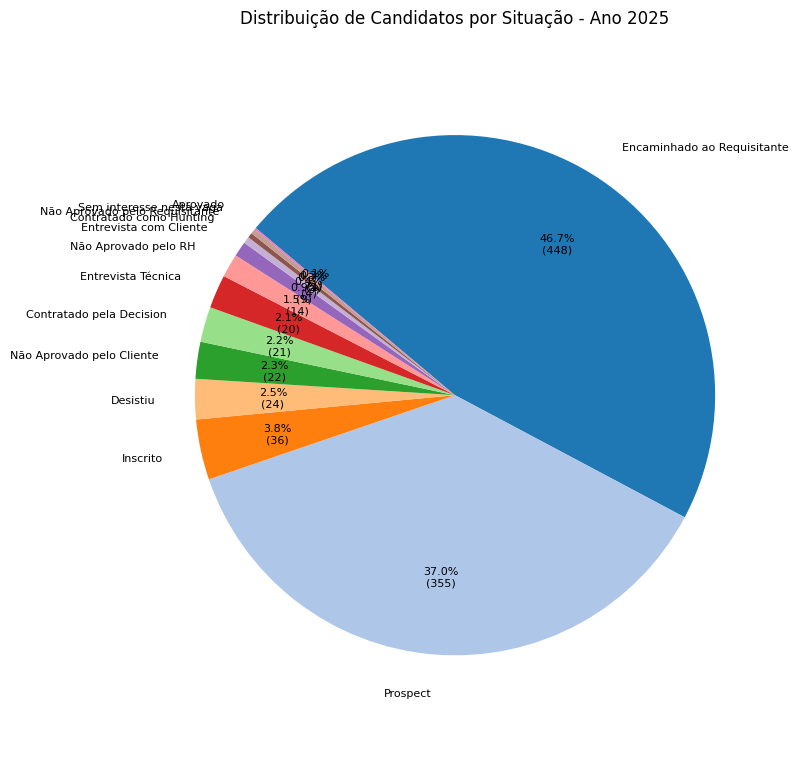

In [186]:
# Filter for the current year '2025'
df_filtered = df_Prospects[df_Prospects['ano'] == 2025]

# Group by candidate status
status_counts = df_filtered['situacao_candidado'].value_counts()

# Custom function to show percentage and count
def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return inner_autopct

# Use tab20 color map
colors = plt.cm.tab20.colors  # A tuple of 20 distinct colours

plt.figure(figsize=(8, 8))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct=autopct_format(status_counts),
    startangle=140,
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8},
    colors=colors[:len(status_counts)]  # Limit to number of categories
)
plt.title('Distribuição de Candidatos por Situação - Ano 2025', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

##Applicants JSON file

In [188]:
df_Applicants.shape

(42482, 58)

In [189]:
#We can see that some columns contain over 40000 NaN or empty values, out of a total of 42482 rows
(df_Applicants.isnull() | (df_Applicants == '')).sum()

,0
id_applicant,0
infos_basicas__telefone_recado,42482
infos_basicas__telefone,1456
infos_basicas__objetivo_profissional,14416
infos_basicas__data_criacao,2
infos_basicas__inserido_por,0
infos_basicas__email,0
infos_basicas__local,25474
infos_basicas__sabendo_de_nos_por,22106
infos_basicas__data_atualizacao,2


In [191]:
# Count NaN or empty values per column
empty_counts = (df_Applicants.isnull() | (df_Applicants == '')).sum()

# Filter columns with more than 40,000 empty/NaN values
columns_with_many_missing = empty_counts[empty_counts > 40000]

# The following columns will be deleted
columns_with_many_missing

,0
infos_basicas__telefone_recado,42482
informacoes_pessoais__cpf,42482
informacoes_pessoais__email_secundario,42482
informacoes_pessoais__telefone_recado,42482
informacoes_pessoais__skype,42482
informacoes_pessoais__url_linkedin,42482
informacoes_pessoais__facebook,42482
informacoes_profissionais__certificacoes,41954
informacoes_profissionais__outras_certificacoes,41583
informacoes_profissionais__nivel_profissional,42402


In [192]:
# Count NaN or empty values per column
empty_counts = (df_Applicants.isnull() | (df_Applicants == '')).sum()

# Identify columns with more than 40,000 missing/empty values
cols_to_drop = empty_counts[empty_counts > 40000].index

# Drop them from the DataFrame
df_Applicants.drop(columns=cols_to_drop, inplace=True)

df_Applicants.columns

Index(['id_applicant', 'infos_basicas__telefone',
       'infos_basicas__objetivo_profissional', 'infos_basicas__data_criacao',
       'infos_basicas__inserido_por', 'infos_basicas__email',
       'infos_basicas__local', 'infos_basicas__sabendo_de_nos_por',
       'infos_basicas__data_atualizacao', 'infos_basicas__codigo_profissional',
       'infos_basicas__nome', 'informacoes_pessoais__data_aceite',
       'informacoes_pessoais__nome', 'informacoes_pessoais__fonte_indicacao',
       'informacoes_pessoais__email', 'informacoes_pessoais__data_nascimento',
       'informacoes_pessoais__telefone_celular', 'informacoes_pessoais__sexo',
       'informacoes_pessoais__estado_civil', 'informacoes_pessoais__pcd',
       'informacoes_pessoais__endereco',
       'informacoes_profissionais__titulo_profissional',
       'informacoes_profissionais__area_atuacao',
       'informacoes_profissionais__conhecimentos_tecnicos',
       'informacoes_profissionais__remuneracao',
       'formacao_e_idiomas__

In [194]:
df_Applicants.dtypes

,0
id_applicant,object
infos_basicas__telefone,object
infos_basicas__objetivo_profissional,object
infos_basicas__data_criacao,object
infos_basicas__inserido_por,object
infos_basicas__email,object
infos_basicas__local,object
infos_basicas__sabendo_de_nos_por,object
infos_basicas__data_atualizacao,object
infos_basicas__codigo_profissional,object


In [195]:
df_Applicants.nunique()

,0
id_applicant,42482
infos_basicas__telefone,41026
infos_basicas__objetivo_profissional,8368
infos_basicas__data_criacao,41708
infos_basicas__inserido_por,63
infos_basicas__email,41482
infos_basicas__local,721
infos_basicas__sabendo_de_nos_por,14
infos_basicas__data_atualizacao,41761
infos_basicas__codigo_profissional,42482


In [196]:
df_Applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42482 entries, 0 to 42481
Data columns (total 33 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   id_applicant                                       42482 non-null  object
 1   infos_basicas__telefone                            42482 non-null  object
 2   infos_basicas__objetivo_profissional               42482 non-null  object
 3   infos_basicas__data_criacao                        42482 non-null  object
 4   infos_basicas__inserido_por                        42482 non-null  object
 5   infos_basicas__email                               42482 non-null  object
 6   infos_basicas__local                               42482 non-null  object
 7   infos_basicas__sabendo_de_nos_por                  42482 non-null  object
 8   infos_basicas__data_atualizacao                    42482 non-null  object
 9   infos_basicas__co

In [200]:
# Convert date fields to datetime
df_Applicants['infos_basicas__data_criacao'] = pd.to_datetime(df_Applicants['infos_basicas__data_criacao'], format='%d-%m-%Y %H:%M:%S', errors='coerce' )
df_Applicants['infos_basicas__data_atualizacao'] = pd.to_datetime(df_Applicants['infos_basicas__data_atualizacao'], format='%d-%m-%Y %H:%M:%S', errors='coerce' )
df_Applicants['informacoes_pessoais__data_aceite'] = pd.to_datetime(df_Applicants['informacoes_pessoais__data_aceite'], format='%d-%m-%Y %H:%M:%S', errors='coerce' )
df_Applicants['informacoes_pessoais__data_nascimento'] = pd.to_datetime(df_Applicants['informacoes_pessoais__data_nascimento'], format='%d-%m-%Y %H:%M:%S', errors='coerce' )

In [201]:
df_Applicants.head()

,id_applicant,infos_basicas__telefone,infos_basicas__objetivo_profissional,infos_basicas__data_criacao,infos_basicas__inserido_por,infos_basicas__email,infos_basicas__local,infos_basicas__sabendo_de_nos_por,infos_basicas__data_atualizacao,infos_basicas__codigo_profissional,...,informacoes_profissionais__conhecimentos_tecnicos,informacoes_profissionais__remuneracao,formacao_e_idiomas__nivel_academico,formacao_e_idiomas__nivel_ingles,formacao_e_idiomas__nivel_espanhol,formacao_e_idiomas__outro_idioma,cv_pt,formacao_e_idiomas__cursos,formacao_e_idiomas__ano_conclusao,informacoes_pessoais__download_cv
0,31000,(11) 97048-2708,,2021-11-10 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,2021-11-10 07:29:49,31000,...,,,,,,-,assistente administrativo\n\n\nsantosbatista\n...,NaN,NaN,NaN
1,31001,(11) 93723-4396,Analista Administrativo,2021-11-10 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,2021-11-11 11:10:31,31001,...,,1900,Ensino Superior Incompleto,Nenhum,Nenhum,-,formação acadêmica\nensino médio (2º grau) em ...,NaN,NaN,NaN
2,31002,(11) 92399-9824,Administrativo | Financeiro,2021-11-10 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,2021-11-10 11:42:36,31002,...,,"2.500,00",Ensino Superior Completo,Intermediário,Básico,Português - Fluente,objetivo: área administrativa | financeira\n\n...,Administração de Empresas,2012,NaN
3,31003,(11) 98100-1727,Área administrativa,2021-11-10 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,2021-11-10 16:04:51,31003,...,,"1100,00",Ensino Superior Incompleto,Nenhum,Nenhum,-,formação\nensino médio completo\ninformática i...,NaN,NaN,NaN
4,31004,(11) 92517-2678,,2021-11-10 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,2021-11-10 09:22:03,31004,...,,,,,,-,última atualização em 09/11/2021\n­ sp\n\nensi...,NaN,NaN,NaN


In [204]:
df_Applicants['infos_basicas__objetivo_profissional'].nunique()

8368

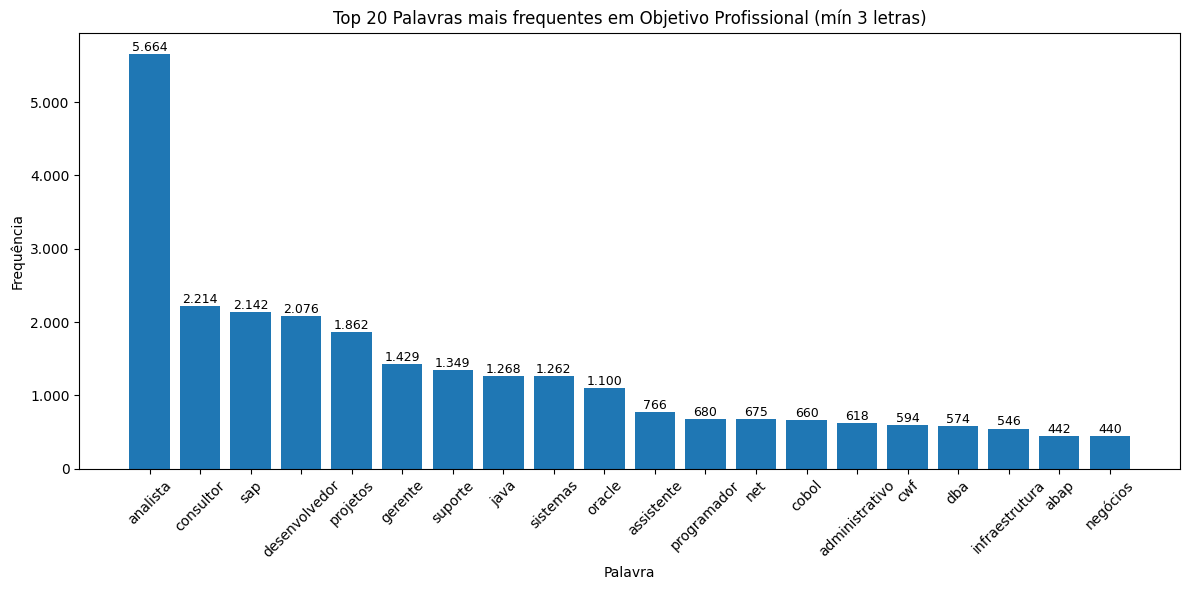

In [217]:
# Step 1: Prepare the text
objetivos = df_Applicants['infos_basicas__objetivo_profissional'].dropna().astype(str)

# Step 2: Clean and filter
all_text = ' '.join(objetivos).lower()
all_text = re.sub(r'[^\w\s]', '', all_text)
words = [word for word in all_text.split() if len(word) >= 3]
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

# Step 3: Create DataFrame
common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Step 4: Custom dot formatter
def dot_thousands(x, pos):
    return f'{int(x):,}'.replace(',', '.')

formatter = FuncFormatter(dot_thousands)

# Step 5: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(common_df['word'], common_df['count'])

# Add labels with dot separator
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.3, f'{height:,}'.replace(',', '.'),
             ha='center', va='bottom', fontsize=9)

# Apply dot separator to y-axis
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Top 20 Palavras mais frequentes em Objetivo Profissional (mín 3 letras)')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Vagas JSON file

In [219]:
df_Vagas.shape

(14081, 45)

In [222]:
#We can see that some columns contain over 14000 NaN or empty values, out of a total of 42482 rows
(df_Vagas.isnull() | (df_Vagas == '')).sum()

,0
id_vaga,0
informacoes_basicas__data_requicisao,0
informacoes_basicas__limite_esperado_para_contratacao,0
informacoes_basicas__titulo_vaga,0
informacoes_basicas__vaga_sap,0
informacoes_basicas__cliente,0
informacoes_basicas__solicitante_cliente,0
informacoes_basicas__empresa_divisao,0
informacoes_basicas__requisitante,0
informacoes_basicas__analista_responsavel,0


In [225]:
 # Count NaN or empty values per column
empty_counts = (df_Vagas.isnull() | (df_Vagas == '')).sum()


# Filter columns with more than 13.000 empty/NaN values
columns_with_many_missing = empty_counts[empty_counts > 13000]


# The following columns will be deleted
columns_with_many_missing

,0
informacoes_basicas__nome,13948
informacoes_basicas__telefone,14078
perfil_vaga__horario_trabalho,13943
perfil_vaga__outro_idioma,13708
beneficios__valor_compra_2,14034
informacoes_basicas__nome_substituto,13809


In [226]:
# Count NaN or empty values per column
empty_counts = (df_Vagas.isnull() | (df_Vagas == '')).sum()

# Identify columns with more than 13.000 missing/empty values
cols_to_drop = empty_counts[empty_counts > 13000].index

# Drop them from the DataFrame
df_Vagas.drop(columns=cols_to_drop, inplace=True)

df_Vagas.columns

Index(['id_vaga', 'informacoes_basicas__data_requicisao',
       'informacoes_basicas__limite_esperado_para_contratacao',
       'informacoes_basicas__titulo_vaga', 'informacoes_basicas__vaga_sap',
       'informacoes_basicas__cliente',
       'informacoes_basicas__solicitante_cliente',
       'informacoes_basicas__empresa_divisao',
       'informacoes_basicas__requisitante',
       'informacoes_basicas__analista_responsavel',
       'informacoes_basicas__tipo_contratacao',
       'informacoes_basicas__prazo_contratacao',
       'informacoes_basicas__objetivo_vaga',
       'informacoes_basicas__prioridade_vaga',
       'informacoes_basicas__origem_vaga',
       'informacoes_basicas__superior_imediato', 'perfil_vaga__pais',
       'perfil_vaga__estado', 'perfil_vaga__cidade', 'perfil_vaga__bairro',
       'perfil_vaga__regiao', 'perfil_vaga__local_trabalho',
       'perfil_vaga__vaga_especifica_para_pcd', 'perfil_vaga__faixa_etaria',
       'perfil_vaga__nivel profissional', 'perfil_vag

In [228]:
df_Vagas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14081 entries, 0 to 14080
Data columns (total 39 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   id_vaga                                                14081 non-null  object
 1   informacoes_basicas__data_requicisao                   14081 non-null  object
 2   informacoes_basicas__limite_esperado_para_contratacao  14081 non-null  object
 3   informacoes_basicas__titulo_vaga                       14081 non-null  object
 4   informacoes_basicas__vaga_sap                          14081 non-null  object
 5   informacoes_basicas__cliente                           14081 non-null  object
 6   informacoes_basicas__solicitante_cliente               14081 non-null  object
 7   informacoes_basicas__empresa_divisao                   14081 non-null  object
 8   informacoes_basicas__requisitante                      1

In [229]:
df_Vagas.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
id_vaga,informacoes_basicas__data_requicisao,informacoes_basicas__limite_esperado_para_contratacao,informacoes_basicas__titulo_vaga,informacoes_basicas__vaga_sap,informacoes_basicas__cliente,informacoes_basicas__solicitante_cliente,informacoes_basicas__empresa_divisao,informacoes_basicas__requisitante,informacoes_basicas__analista_responsavel,informacoes_basicas__tipo_contratacao,informacoes_basicas__prazo_contratacao,informacoes_basicas__objetivo_vaga,informacoes_basicas__prioridade_vaga,informacoes_basicas__origem_vaga,informacoes_basicas__superior_imediato,perfil_vaga__pais,perfil_vaga__estado,perfil_vaga__cidade,perfil_vaga__bairro,perfil_vaga__regiao,perfil_vaga__local_trabalho,perfil_vaga__vaga_especifica_para_pcd,perfil_vaga__faixa_etaria,perfil_vaga__nivel profissional,perfil_vaga__nivel_academico,perfil_vaga__nivel_ingles,perfil_vaga__nivel_espanhol,perfil_vaga__areas_atuacao,perfil_vaga__principais_atividades,perfil_vaga__competencia_tecnicas_e_comportamentais,perfil_vaga__demais_observacoes,perfil_vaga__viagens_requeridas,perfil_vaga__equipamentos_necessarios,beneficios__valor_venda,beneficios__valor_compra_1,informacoes_basicas__data_inicial,informacoes_basicas__data_final,perfil_vaga__habilidades_comportamentais_necessarias,


In [232]:
# Convert date fields to datetime
df_Vagas['informacoes_basicas__data_requicisao'] = pd.to_datetime(df_Vagas['informacoes_basicas__data_requicisao'], format='%d-%m-%Y', errors='coerce' )
df_Vagas['informacoes_basicas__data_inicial'] = pd.to_datetime(df_Vagas['informacoes_basicas__data_inicial'], format='%d-%m-%Y', errors='coerce' )
df_Vagas['informacoes_basicas__data_final'] = pd.to_datetime(df_Vagas['informacoes_basicas__data_final'], format='%d-%m-%Y', errors='coerce' )

In [233]:
df_Vagas.head()

,id_vaga,informacoes_basicas__data_requicisao,informacoes_basicas__limite_esperado_para_contratacao,informacoes_basicas__titulo_vaga,informacoes_basicas__vaga_sap,informacoes_basicas__cliente,informacoes_basicas__solicitante_cliente,informacoes_basicas__empresa_divisao,informacoes_basicas__requisitante,informacoes_basicas__analista_responsavel,...,perfil_vaga__principais_atividades,perfil_vaga__competencia_tecnicas_e_comportamentais,perfil_vaga__demais_observacoes,perfil_vaga__viagens_requeridas,perfil_vaga__equipamentos_necessarios,beneficios__valor_venda,beneficios__valor_compra_1,informacoes_basicas__data_inicial,informacoes_basicas__data_final,perfil_vaga__habilidades_comportamentais_necessarias
0,5185,2021-05-04,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,Operations Lead\n\nRoles & Responsibilities:\n...,Required Skills:\n• Prior experience in Cloud ...,100% Remoto Período – entre 5 – 6 meses,,Nenhum -,-,R$,NaT,NaT,NaN
1,5184,2021-05-04,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,Consultor PP/QM Sr.\n\n• Consultor PP/QM Sênio...,• Consultor PP/QM Sênior com experiencia em pr...,• Início: Imediato • Fim: Jan/22,,Nenhum -,-,R$,NaT,NaT,NaN
2,5183,2021-05-04,00-00-0000,ANALISTA PL/JR C/ SQL,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Ana Albuquerque,...,Descrição – Atividades:\n\no Monitoramento das...,Requisitos mandatórios:\n\no Conhecimentos Téc...,Localização: Remoto Perfil: Analista Pleno ou ...,,Nenhum -,-,R$,NaT,NaT,NaN
3,5182,2021-05-04,18-05-2021,Technical Architect - 11894809,Não,Nelson-Page,Dr. Raul Monteiro,Decision São Paulo,Cecília Freitas,Clara Rios,...,Descrição/Comentário: Architecture Frameworks ...,Descrição/Comentário: Architecture Frameworks ...,Budgeted Rate - indicate currency and type (ho...,Não,Notebook padrão -,- p/ mês (168h),fechado,2021-05-18,2022-01-17,NaN
4,5181,2021-05-04,00-00-0000,Consultor SAP AUTHORIZATION (BCA) -Pleno / Sênior,Não,Mann and Sons,Cauê Fogaça,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,Experiência como Consultor SAP AUTHORIZATION (...,Experiência como Consultor SAP AUTHORIZATION (...,contratação CLT full pela Decision locação rem...,Sim,Nenhum -,-,R$,NaT,NaT,NaN


In [234]:
df_Vagas['informacoes_basicas__titulo_vaga'].unique()

array(['Operation Lead -', 'Consultor PP/QM Sênior',
       'ANALISTA PL/JR C/ SQL', ...,
       '964 - Assistente fiscal ou financeiro',
       '966 - Analista pleno ou sênior de área fiscal',
       '965 - Assistente ou analista de área contábil'], dtype=object)

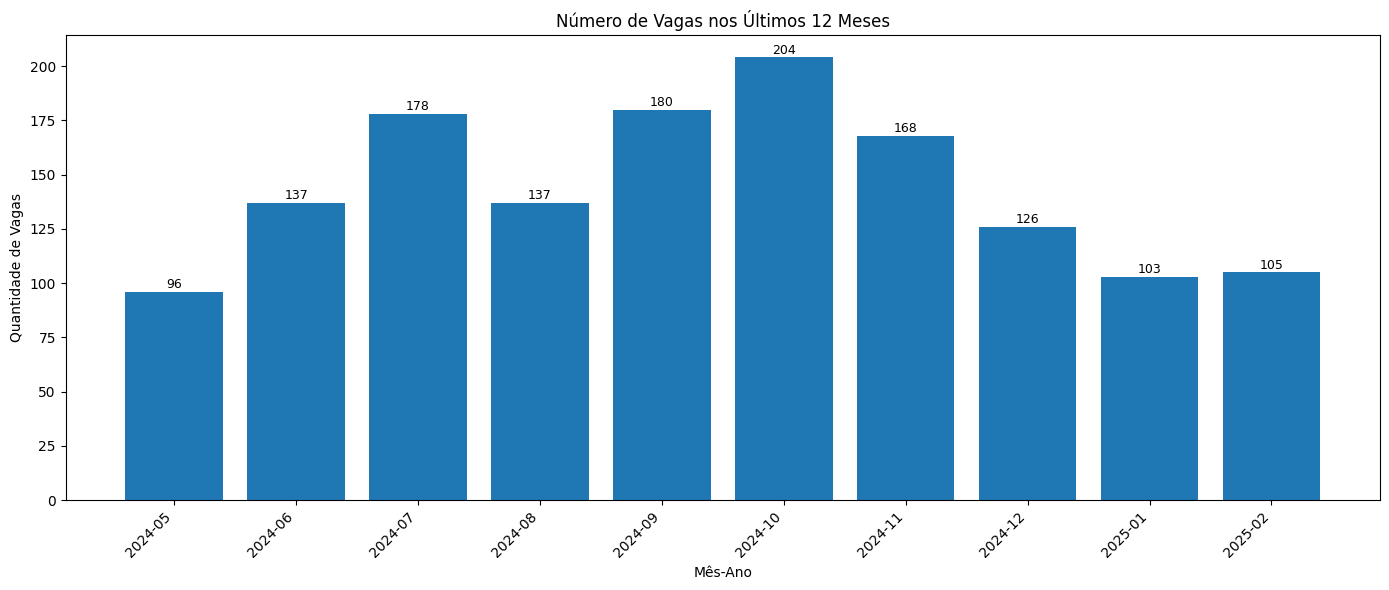

In [241]:
# Convert to datetime
df_Vagas['data_requicisao_dt'] = pd.to_datetime(
    df_Vagas['informacoes_basicas__data_requicisao'],
    errors='coerce'
)

# Create a Month-Year column
df_Vagas['mes_ano'] = df_Vagas['data_requicisao_dt'].dt.to_period('M').astype(str)

# Filter for the last 12 months
cutoff = pd.to_datetime('today') - pd.DateOffset(months=12)
df_last_12 = df_Vagas[df_Vagas['data_requicisao_dt'] >= cutoff]

# Group and count
vagas_last_12 = df_last_12.groupby('mes_ano')['id_vaga'].count().sort_index()

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(vagas_last_12.index, vagas_last_12.values)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, str(height),
             ha='center', va='bottom', fontsize=9)

plt.title('Número de Vagas nos Últimos 12 Meses')
plt.xlabel('Mês-Ano')
plt.ylabel('Quantidade de Vagas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()